<a href="https://colab.research.google.com/github/Asto7/deep-learning/blob/main/mobilePriceClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 26.3MB/s]


In [5]:
!unzip mobile-price-classification


Archive:  mobile-price-classification.zip
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd
df = pd.read_csv('./train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [7]:
dataset = df.values
X  = dataset[:,0:20]
Y = dataset[:, 20]

In [8]:
from sklearn import preprocessing

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
X_scale

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1400, 20) (300, 20) (300, 20) (1400,) (300,) (300,)


In [12]:
import tensorflow as tf

C = tf.constant(4, name = "C") 

Y_VAL = tf.one_hot( 
    Y_val, C, on_value = 1.0, off_value = 0.0, axis =-1) 

Y_TRAIN = tf.one_hot( 
    Y_train, C, on_value = 1.0, off_value = 0.0, axis =-1) 

Y_TEST = tf.one_hot( 
    Y_test, C, on_value = 1.0, off_value = 0.0, axis =-1) 

Y_VAL

<tf.Tensor: shape=(300, 4), dtype=float32, numpy=
array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [13]:
from keras.models import Sequential
from keras.layers import Dense

In [14]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(20,)),
    Dense(16, activation='relu'),
    Dense(4, activation='sigmoid'),
])

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
hist = model.fit(X_train, Y_TRAIN,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_VAL))

Epoch 1/100
44/44 [==============================] - 3s 14ms/step - loss: 1.3945 - accuracy: 0.2696 - val_loss: 1.3898 - val_accuracy: 0.2433
Epoch 2/100
44/44 [==============================] - 0s 4ms/step - loss: 1.3545 - accuracy: 0.3361 - val_loss: 1.3437 - val_accuracy: 0.3467
Epoch 3/100
44/44 [==============================] - 0s 4ms/step - loss: 1.2893 - accuracy: 0.4545 - val_loss: 1.2632 - val_accuracy: 0.4267
Epoch 4/100
44/44 [==============================] - 0s 4ms/step - loss: 1.1951 - accuracy: 0.5223 - val_loss: 1.1468 - val_accuracy: 0.5133
Epoch 5/100
44/44 [==============================] - 0s 4ms/step - loss: 1.0539 - accuracy: 0.6171 - val_loss: 0.9938 - val_accuracy: 0.6200
Epoch 6/100
44/44 [==============================] - 0s 4ms/step - loss: 0.9205 - accuracy: 0.6893 - val_loss: 0.8714 - val_accuracy: 0.6767
Epoch 7/100
44/44 [==============================] - 0s 4ms/step - loss: 0.8122 - accuracy: 0.7094 - val_loss: 0.7736 - val_accuracy: 0.7367
Epoch 8/100


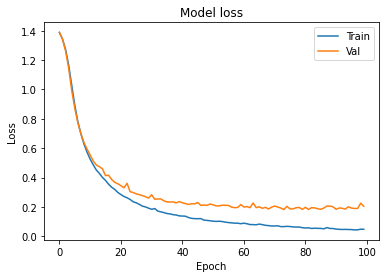

In [17]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

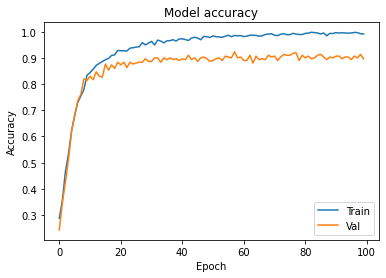

In [18]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [19]:
from keras.layers import Dropout
from keras import regularizers
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(20,), kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer = regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(4, activation='sigmoid', kernel_regularizer = regularizers.l2(0.01)),
])

model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_TRAIN,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_VAL))
# hist_2 = model_2.fit(X_train, Y_TRAIN, batch_size=32, epochs=100, validation_data=(X_val, Y_VAL))

Epoch 1/100
44/44 [==============================] - 1s 14ms/step - loss: 20.3027 - accuracy: 0.2889 - val_loss: 2.7047 - val_accuracy: 0.5133
Epoch 2/100
44/44 [==============================] - 0s 9ms/step - loss: 2.0159 - accuracy: 0.5722 - val_loss: 1.0636 - val_accuracy: 0.7333
Epoch 3/100
44/44 [==============================] - 0s 8ms/step - loss: 1.0959 - accuracy: 0.7209 - val_loss: 1.0253 - val_accuracy: 0.7633
Epoch 4/100
44/44 [==============================] - 0s 8ms/step - loss: 1.0150 - accuracy: 0.7390 - val_loss: 0.8224 - val_accuracy: 0.8467
Epoch 5/100
44/44 [==============================] - 0s 8ms/step - loss: 0.8466 - accuracy: 0.8323 - val_loss: 0.7803 - val_accuracy: 0.8733
Epoch 6/100
44/44 [==============================] - 0s 8ms/step - loss: 0.8102 - accuracy: 0.8350 - val_loss: 0.8123 - val_accuracy: 0.8467
Epoch 7/100
44/44 [==============================] - 0s 8ms/step - loss: 0.7887 - accuracy: 0.8625 - val_loss: 0.7164 - val_accuracy: 0.9033
Epoch 8/100

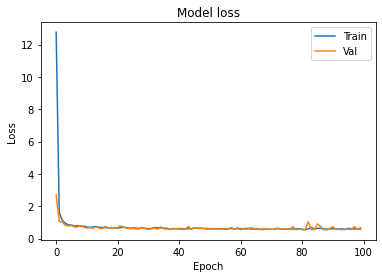

In [20]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

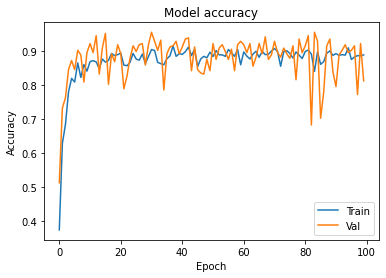

In [21]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [25]:
model.evaluate(X_test, Y_TEST)


10/10 [==============================] - 0s 2ms/step - loss: 0.1770 - accuracy: 0.9033


[0.17700804769992828, 0.903333306312561]

In [26]:
model_2.evaluate(X_test, Y_TEST)

10/10 [==============================] - 0s 4ms/step - loss: 0.6659 - accuracy: 0.8467


[0.6658517718315125, 0.846666693687439]